In [1]:
import time
start = time.time()
time.time()

1698896929.2479098

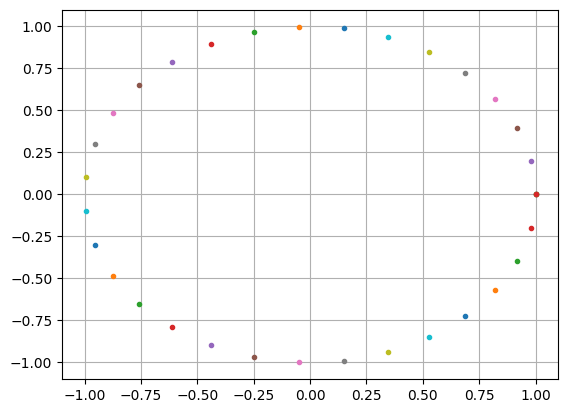

In [6]:
# plot of rotating circle through 0 to 2pi, with various points on it
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
plt.grid()

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

def update(frame):
    plt.plot(np.cos(2*np.pi*frame/31), np.sin(2*np.pi*frame/31), '.')
    return fig,

anim = FuncAnimation(fig, update, frames=31, blit=True)
anim.save('circle.gif', writer=PillowWriter(10))

In [8]:
import numpy as np

N = 100000

X = np.array([list(range(N)), np.random.rand(N)])

X[1, :] = (3*X[1, :]).astype(int)

X

array([[0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 9.9997e+04, 9.9998e+04,
        9.9999e+04],
       [1.0000e+00, 2.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00]])

In [29]:
states = X[1, :]

In [30]:
transitions = dict()

for i in range(N):
    if 1 == i:
        continue

    curr = states[i]
    prev = states[i-1]

    if prev not in transitions:
        transitions[prev] = dict()
        transitions[prev][curr] = 1
        continue

    transitions[prev][curr] = transitions[prev].get(curr, 0) + 1


In [37]:
num_states = len(set(states))
P = np.zeros((num_states, num_states))
for state, rule in transitions.items():
    # print(state, rule)
    for next_state, count in rule.items():
        print(f"{state} -> {next_state}", count / N)
        P[int(state), int(next_state)] = count / N

2.0 -> 1.0 0.11161
2.0 -> 0.0 0.11095
2.0 -> 2.0 0.11067
0.0 -> 1.0 0.11031
0.0 -> 0.0 0.11104
0.0 -> 2.0 0.11274
1.0 -> 0.0 0.1121
1.0 -> 2.0 0.10981
1.0 -> 1.0 0.11076


In [38]:
P

array([[0.11104, 0.11031, 0.11274],
       [0.1121 , 0.11076, 0.10981],
       [0.11095, 0.11161, 0.11067]])

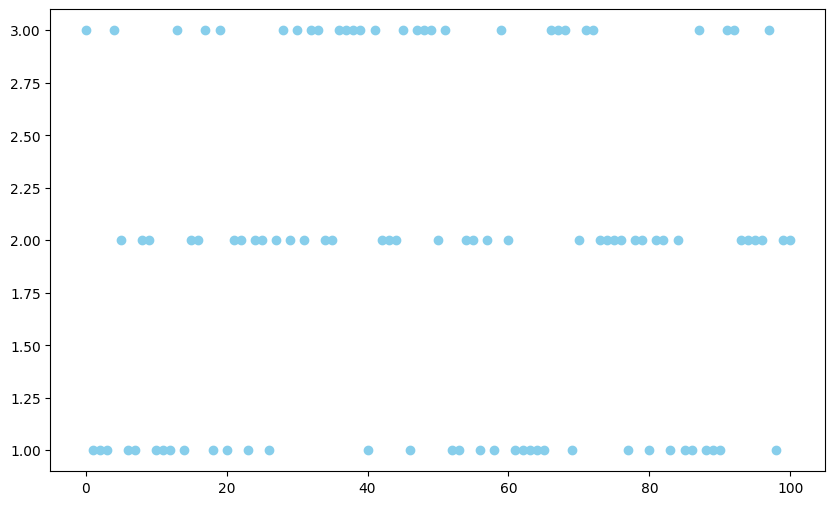

In [42]:
X0 = 3.0
Xs = [X0]

for _ in range(100):
    probabilities = P[int(X0)-1, :]
    # Renormalize the probabilities
    probabilities /= probabilities.sum()
    X0 = np.random.choice([1.0, 2.0, 3.0], p=probabilities)
    Xs.append(X0)

plt.figure(figsize=(10, 6))
plt.plot(Xs, 'o', color='skyblue')

In [44]:
def get_stationary_distribution(P, n_iter=100):
    """
    P: transition matrix
    n_iter: number of iterations
    """
    # initialize
    pi = np.random.rand(P.shape[0])
    pi = pi / pi.sum()

    for i in range(n_iter):
        pi = P @ pi

    return pi

pi = get_stationary_distribution(P, n_iter=1000)

pi


array([0.33349063, 0.33349063, 0.33349063])

In [45]:
def get_stationary_distribution(P, n_iter=100):
    """
    P: transition matrix
    n_iter: number of iterations
    """
    # initialize
    pi = np.random.rand(P.shape[0])
    pi = pi / pi.sum()

    for i in range(n_iter):
        pi = pi @ P

    return pi

pi = get_stationary_distribution(P, n_iter=1000)

pi


array([0.33409338, 0.33268331, 0.33322331])

In [47]:
from collections import Counter

site_counts = Counter(states)
site_counts

Counter({0.0: 33409, 2.0: 33323, 1.0: 33268})

In [8]:
import time
end = time.time()
print(f"{(end - 1698896929.2479098)/60:.0f}", "mins")

# this round the number up to the nearest integer...

17 mins
